# Example of sequential fitting
finding the location of the Bar in each tube for a data set from a Bar in a Bar scan for GPSANS

In [1]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
import lmfit

In [2]:
%matplotlib notebook

In [3]:
pwd

'/Users/19g/builds/IPythonNotebookTutorial/solutions'

In [4]:
data_dir = '../Data/Fitting/'

Load the xml file 

In [5]:
fl_name=data_dir+str('CG2_exp331_scan0005_0029.xml')
with open(fl_name,'r') as f:
        root=ET.parse(f)


Get the root of the XML tree


In [6]:
rt=root.getroot()

Loop through the children to find the motor positions

In [7]:
for child in rt:
    print(child)

<Element 'Header' at 0x1a23525818>
<Element 'sample_info' at 0x1a2352ae58>
<Element 'Motor_Positions' at 0x1a2352af98>
<Element 'Parameter_Positions' at 0x1a23531bd8>
<Element 'Counters' at 0x1a235350e8>
<Element 'Data' at 0x1a23535278>


In [8]:
jk=rt.find('Motor_Positions')


In [9]:
for child in jk: 
    print(child)

<Element 'highvoltagecmd' at 0x1a23531048>
<Element 'selector_speed' at 0x1a23531098>
<Element 'selector_tilt' at 0x1a235310e8>
<Element 'cuv1' at 0x1a23531138>
<Element 'cuv2' at 0x1a23531188>
<Element 'cuv3' at 0x1a235311d8>
<Element 'cuv4' at 0x1a23531228>
<Element 'lambda' at 0x1a23531278>
<Element 'dlambda' at 0x1a235312c8>
<Element 'sdd' at 0x1a23531368>
<Element 'coll_1' at 0x1a235313b8>
<Element 'coll_2' at 0x1a23531408>
<Element 'coll_3' at 0x1a23531458>
<Element 'coll_4' at 0x1a235314a8>
<Element 'coll_5' at 0x1a235314f8>
<Element 'coll_6' at 0x1a23531548>
<Element 'coll_7' at 0x1a23531598>
<Element 'coll_8' at 0x1a235315e8>
<Element 'nguides' at 0x1a23531638>
<Element 'attenuator_pos' at 0x1a235316d8>
<Element 'beam_trap_x' at 0x1a23531778>
<Element 'dcal' at 0x1a23531818>
<Element 'detector_trans' at 0x1a23531868>
<Element 'flange_det_dist' at 0x1a235318b8>
<Element 'sample_x' at 0x1a23531908>
<Element 'trap_y_101mm' at 0x1a235319a8>
<Element 'trap_y_25mm' at 0x1a23531a48>


In [10]:
dcal=rt.find('Motor_Positions/dcal')


In [11]:
dcal.attrib.keys()

dict_keys(['pos', 'units', 'description', 'type'])

In [12]:
print('{0:.2f} {1}'.format(float(dcal.attrib['pos']),dcal.attrib['units']))

285.00 mm


In [13]:
dcal.text

'284.999998'

Use the position to finf the pixel number. assuming a 1.1 m tube with 256 pixels

In [14]:
BPos=np.float(dcal.text)
BP_pix=(1-(BPos-5)/1100.)*256

In [15]:
print('{:.3f} {:.3f}'.format(BPos,BP_pix))

285.000 190.836


Let's get the data

In [16]:
dt=rt.find('Data/Detector')

what attributes does it have?

In [17]:
dt.attrib.keys()

dict_keys(['type'])

In [18]:
dt.attrib['type']

'INT32[192,256]'

We'll use the type attribute to help format the data array in memory

In [19]:
type_lst=dt.attrib['type'].split('[')

In [20]:
type_lst

['INT32', '192,256]']

In [21]:
shape_lst=eval('['+type_lst[1])

In [22]:
dt.text

'\n1\t0\t0\t2\t1\t6\t4\t15\t26\t23\t30\t22\t37\t22\t27\t26\t30\t36\t30\t32\t38\t18\t27\t26\t47\t33\t26\t32\t30\t30\t24\t32\t27\t42\t24\t37\t27\t44\t42\t25\t36\t28\t26\t34\t35\t31\t37\t35\t37\t44\t30\t40\t39\t33\t38\t42\t32\t29\t32\t32\t39\t30\t27\t26\t21\t34\t33\t33\t36\t31\t25\t24\t36\t34\t32\t17\t20\t33\t40\t26\t24\t30\t40\t34\t31\t51\t40\t39\t31\t26\t28\t19\t22\t32\t34\t38\t28\t28\t26\t31\t27\t26\t31\t39\t28\t32\t37\t29\t32\t34\t31\t23\t31\t30\t38\t38\t24\t28\t30\t34\t31\t39\t36\t26\t36\t27\t26\t36\t29\t41\t35\t41\t34\t28\t29\t25\t35\t30\t28\t30\t36\t29\t33\t39\t34\t32\t32\t37\t29\t33\t31\t34\t36\t39\t43\t24\t36\t35\t28\t35\t21\t28\t34\t48\t29\t30\t28\t30\t36\t26\t38\t33\t30\t27\t45\t35\t44\t32\t35\t30\t56\t35\t29\t26\t29\t24\t26\t22\t12\t8\t3\t2\t4\t3\t1\t4\t16\t21\t25\t35\t41\t28\t31\t30\t35\t30\t24\t31\t28\t33\t33\t32\t29\t24\t28\t32\t33\t46\t39\t28\t37\t39\t41\t36\t27\t41\t33\t37\t42\t38\t30\t36\t36\t34\t27\t36\t31\t29\t37\t26\t35\t29\t33\t31\t36\t33\t27\t29\t17\t2\t3\t2\t2\t2\t

We need to convert the text from a string to an array and shape it appropriately
We'll use the fromstring command of numpy

In [23]:
dat_array=np.fromstring(dt.text,sep='\t').reshape(shape_lst)
dat_array.shape

(192, 256)

Show the image

<IPython.core.display.Javascript object>


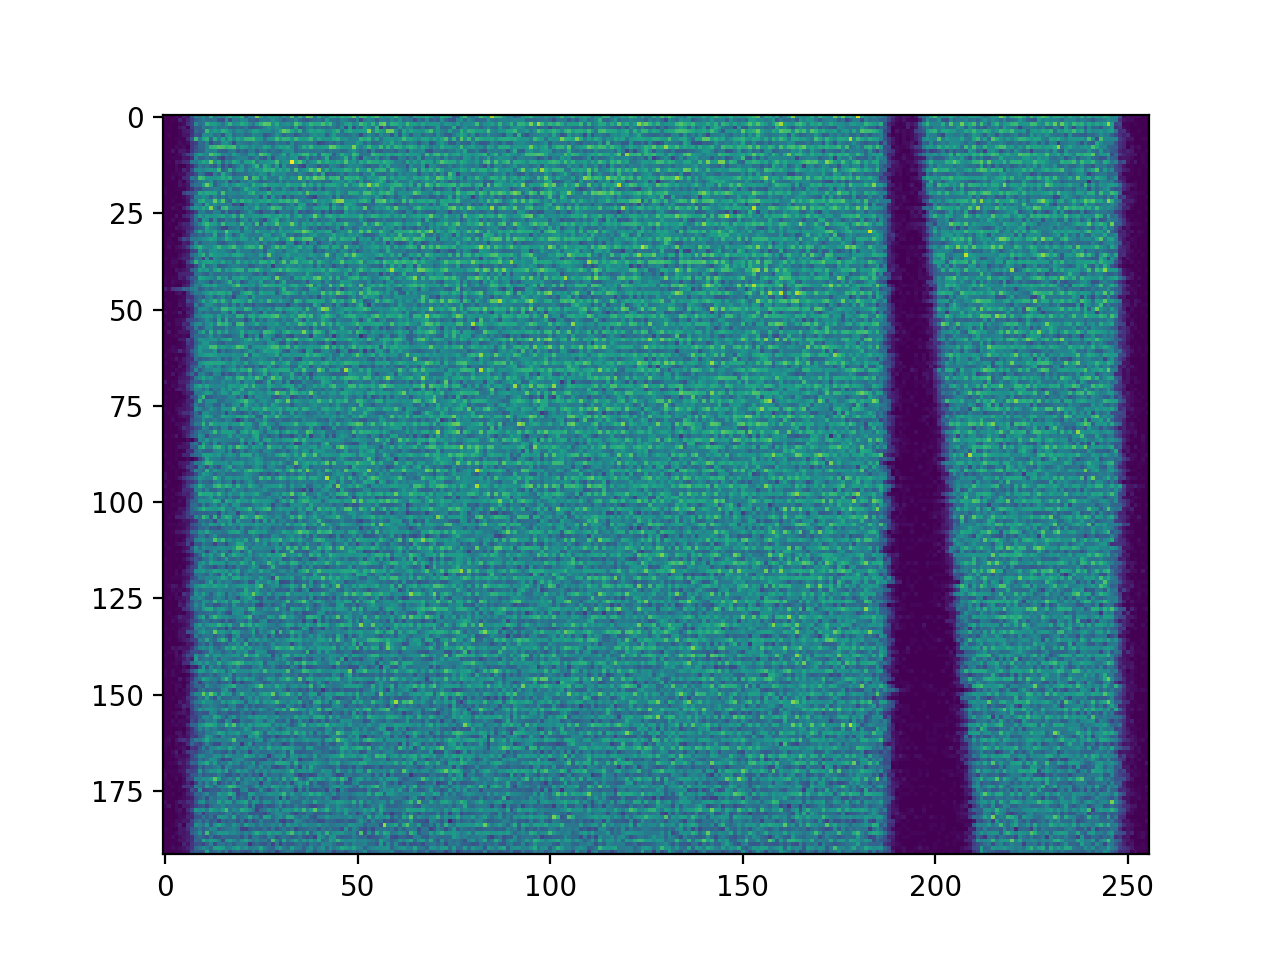

In [24]:
plt.imshow(dat_array)

Make an error array with the minimum error to be $\sqrt 3$

In [25]:
err_array=np.sqrt(dat_array)+np.sqrt(3)

The goal is going to be to fit each tube 
To familarize ourself with data let's plot 
Plot the two end tubes.

<IPython.core.display.Javascript object>


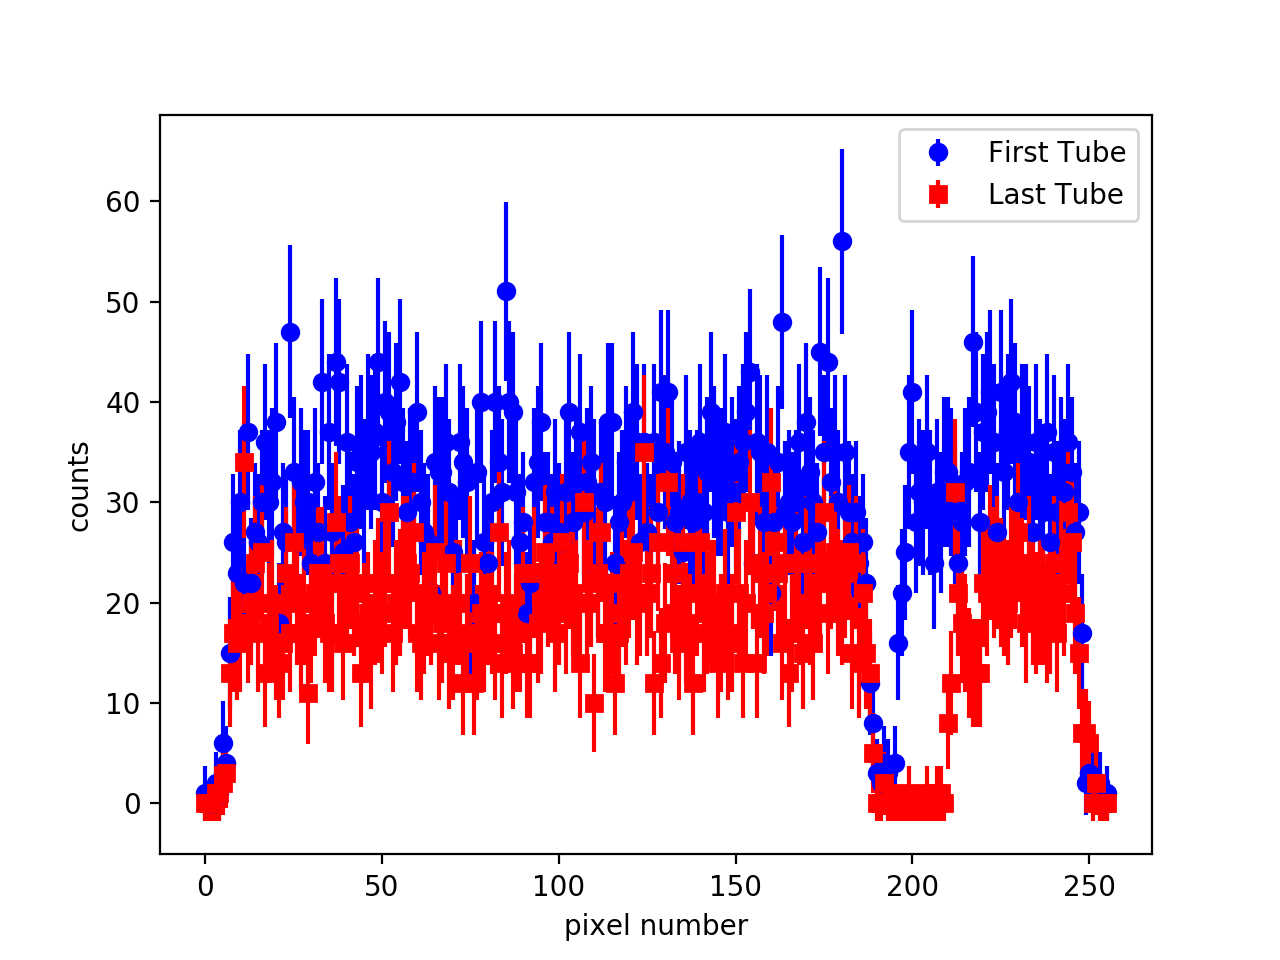

In [26]:
pix_num=np.arange(0,256)
f,ax= plt.subplots()
ax.errorbar(pix_num,dat_array[0,:],yerr=err_array[0,:],fmt='bo',label='First Tube')
ax.errorbar(pix_num,dat_array[-1,:],yerr=err_array[-1,:],fmt='rs',label='Last Tube')
ax.set_xlabel('pixel number')
ax.set_ylabel('counts')
ax.legend()

Define a funtion
Let's define a step function


In [27]:
def step_f(x,cen,Amp,wid,b):
    """a function that is a step along x, centered at cen,
    the slope of the step is controlled by wid and the height by Amp.
    There is also a background term"""
    return b+Amp*(1-np.tanh((x-cen)/wid))/2.   

Let's plot the function on top of some data to see what it looks like

<IPython.core.display.Javascript object>


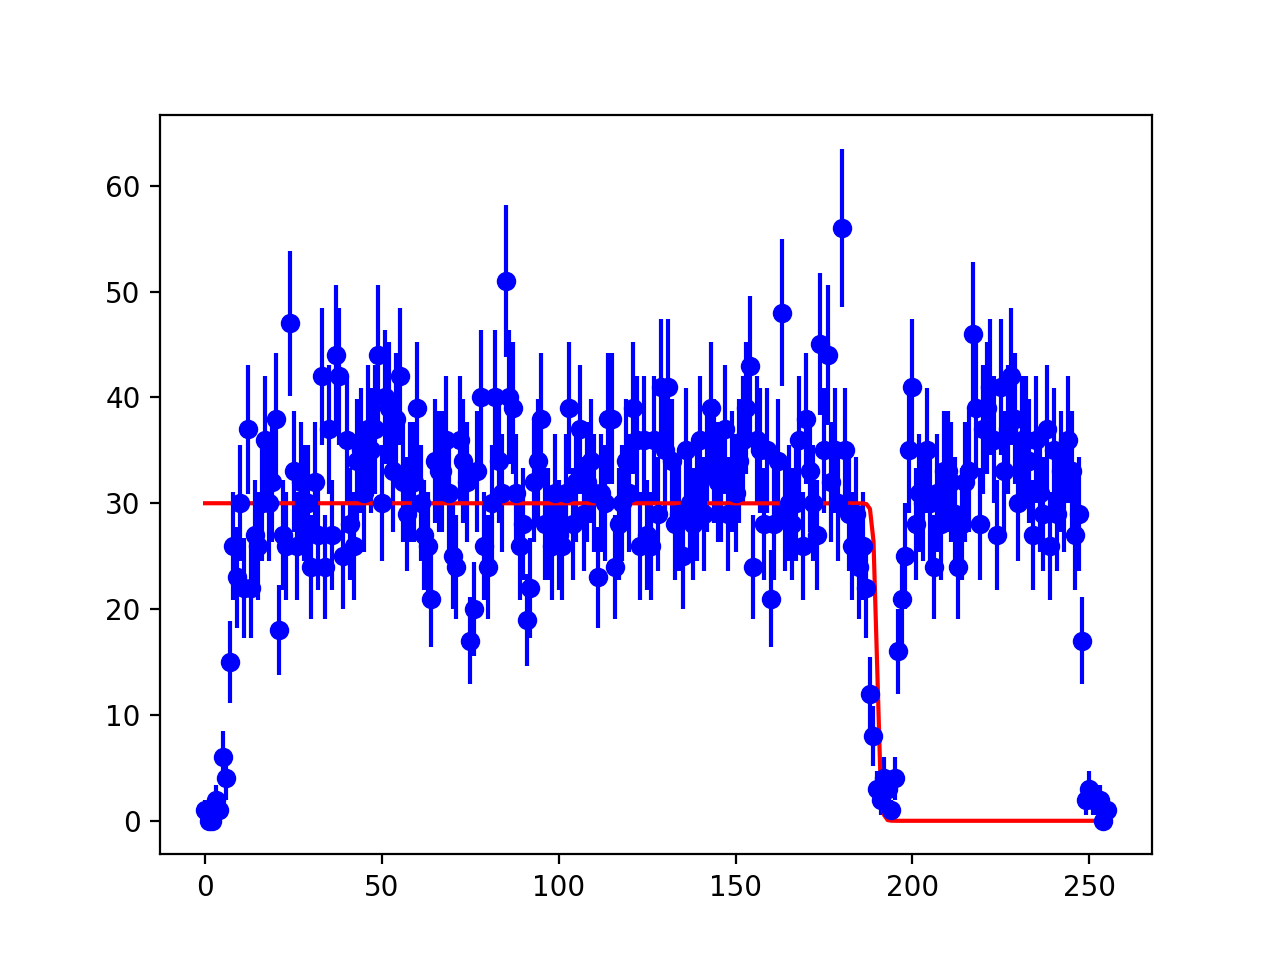

In [28]:
f,ax=plt.subplots()
ax.errorbar(pix_num,dat_array[0,:],yerr=np.sqrt(dat_array[0,:]),fmt='bo')
ax.plot(pix_num,step_f(pix_num,190,30,1,0),'r')
#ax.set_xlim([120,220])

For doing the fitting,  we need to determine the average count number for each tube.
The axis variable takes the average along the desired direction rather than of the whole array

In [29]:
mn_values=np.mean(dat_array,axis=1)

Create the lmfit model

In [30]:
step_mod=lmfit.Model(step_f)

Now let's do a single fit to see how the fitting works.

In [31]:
res=step_mod.fit(dat_array[0,11:196],x=pix_num[11:196],cen=190,Amp=30,wid=1,b=0,weights=1/err_array[0,11:196])

In [32]:
print(res.fit_report())

[[Model]]
    Model(step_f)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 185
    # variables        = 4
    chi-square         = 123.062827
    reduced chi-square = 0.67990512
    Akaike info crit   = -67.4172497
    Bayesian info crit = -54.5358264
[[Variables]]
    cen:  187.392946 +/- 0.43934766 (0.23%) (init = 190)
    Amp:  29.0891697 +/- 1.46132744 (5.02%) (init = 30)
    wid:  2.08552302 +/- 0.74020931 (35.49%) (init = 1)
    b:    2.08988255 +/- 1.37531696 (65.81%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(Amp, b)   = -0.950
    C(wid, b)   = -0.489
    C(Amp, wid) =  0.487
    C(cen, b)   = -0.312
    C(cen, Amp) =  0.259
    C(cen, wid) = -0.116



<IPython.core.display.Javascript object>


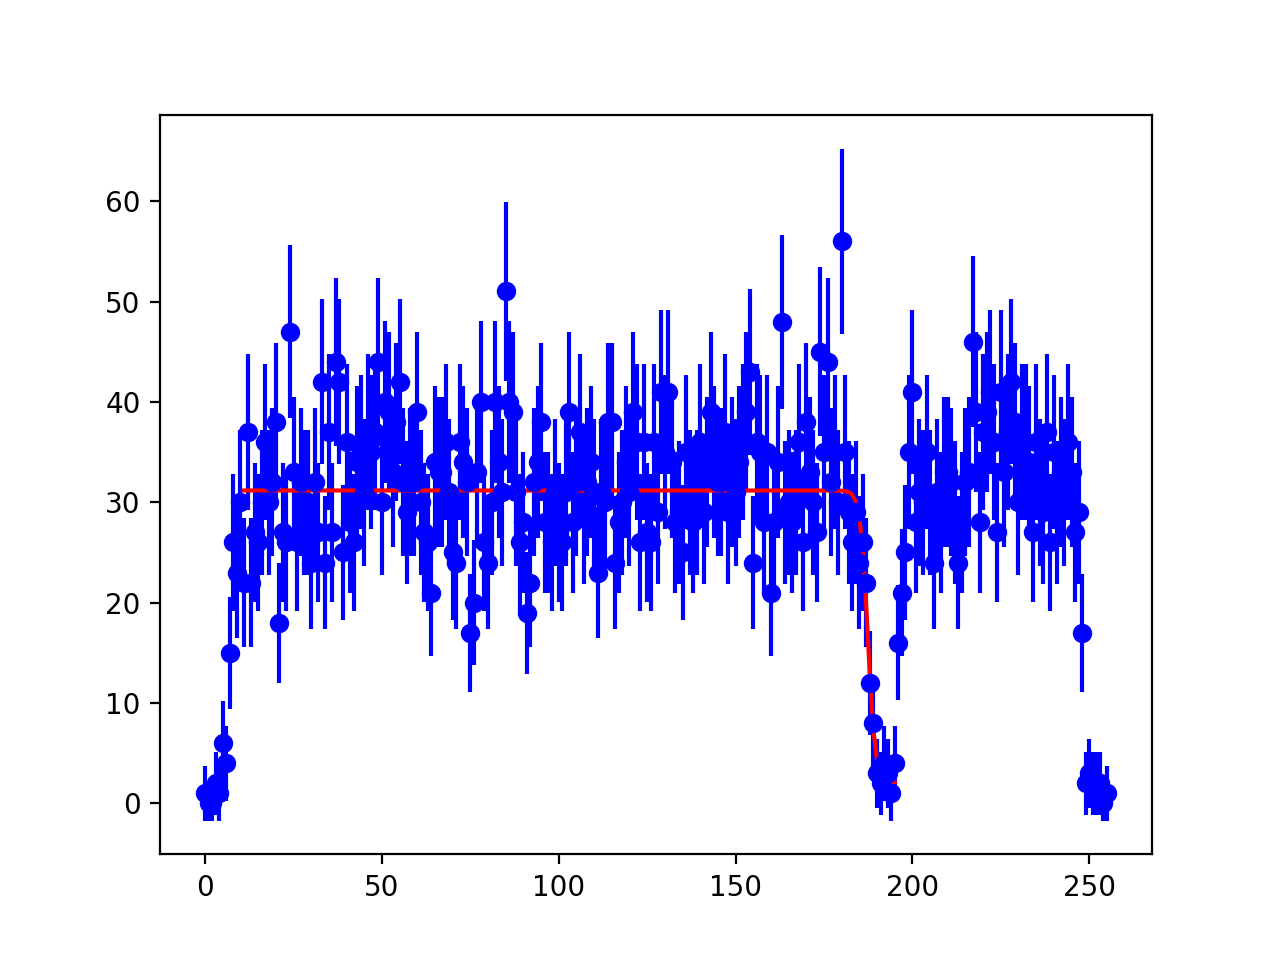

In [33]:
f,ax=plt.subplots()
ax.errorbar(pix_num,dat_array[0,:],yerr=err_array[0,:],fmt='bo')
ax.plot(pix_num[11:196],res.best_fit,'r')
#ax.set_xlim([120,220])

Let's look at what else is the fitting results data structure.

In [34]:
res.params

Parameters([('cen',
             <Parameter 'cen', value=187.39294598064478 +/- 0.439, bounds=[-inf:inf]>),
            ('Amp',
             <Parameter 'Amp', value=29.08916974327178 +/- 1.46, bounds=[-inf:inf]>),
            ('wid',
             <Parameter 'wid', value=2.0855230155042443 +/- 0.74, bounds=[-inf:inf]>),
            ('b',
             <Parameter 'b', value=2.089882545353683 +/- 1.38, bounds=[-inf:inf]>)])

In [35]:
res.params['cen'].value

187.39294598064478

In [36]:
res.params['cen'].stderr

0.43934766048035817

In [37]:
res.redchi

0.679905123133271

Now let's prepare to fit all the tubes.

We need to find the minmum and maximum pixels.

First let's find the pixels that the Bar is covering

In [38]:
max_bar_width = 20

Let's make a boolean array near the expected pixel.

In [39]:
near_bar_b=(pix_num>BP_pix-max_bar_width/2.)&(pix_num<BP_pix+max_bar_width/2.)

Make a boolean array of points less than half the average value.

In [40]:
below_h_mean_b = dat_array[0,:]<0.5*mn_values[0]

In [41]:
max_fit_pixel=pix_num[near_bar_b&below_h_mean_b].max()+1

In [42]:
max_fit_pixel

196

In [44]:
min_fit_pixel= pix_num[below_h_mean_b&(pix_num<BP_pix-max_bar_width/2)].max()+5

In [45]:
min_fit_pixel

11

In [46]:
parm_nms=step_mod.param_names

Next make strctured arrays to hold the paramaters 

In [47]:
fin_parms = np.empty(dtype=[(parm_nms[0],'f8'),(parm_nms[1],'f8'),(parm_nms[2],'f8'),(parm_nms[3],'f8')],shape=dat_array.shape[0])
fin_parms_err = np.empty(dtype=[(parm_nms[0],'f8'),(parm_nms[1],'f8'),(parm_nms[2],'f8'),(parm_nms[3],'f8')],shape=dat_array.shape[0])
fin_chisq = np.empty(shape=dat_array.shape[0])

Loop through each detector and fit

In [49]:
step_res={}
for didx in range(dat_array.shape[0]):
    below_h_mean_b = dat_array[didx,:]<0.5*mn_values[didx]
    max_fit_pixel=pix_num[near_bar_b&below_h_mean_b].max()+1
    min_fit_pixel= pix_num[below_h_mean_b&(pix_num<BP_pix-max_bar_width/2)].max()+5  
    fidxs=np.arange(min_fit_pixel,max_fit_pixel)
    dat_in=dat_array[didx,fidxs]
    err_in=err_array[didx,fidxs]
    step_res[didx]=step_mod.fit(dat_in,x=pix_num[fidxs],cen=BP_pix,Amp=30,wid=1,b=0,weights=1/err_in) 
    for p_name in parm_nms:
        fin_parms[p_name][didx]=step_res[didx].params[p_name].value
        fin_parms_err[p_name][didx]=step_res[didx].params[p_name].stderr
        fin_chisq[didx]=step_res[didx].redchi    

Let's plot the results per tube

<IPython.core.display.Javascript object>


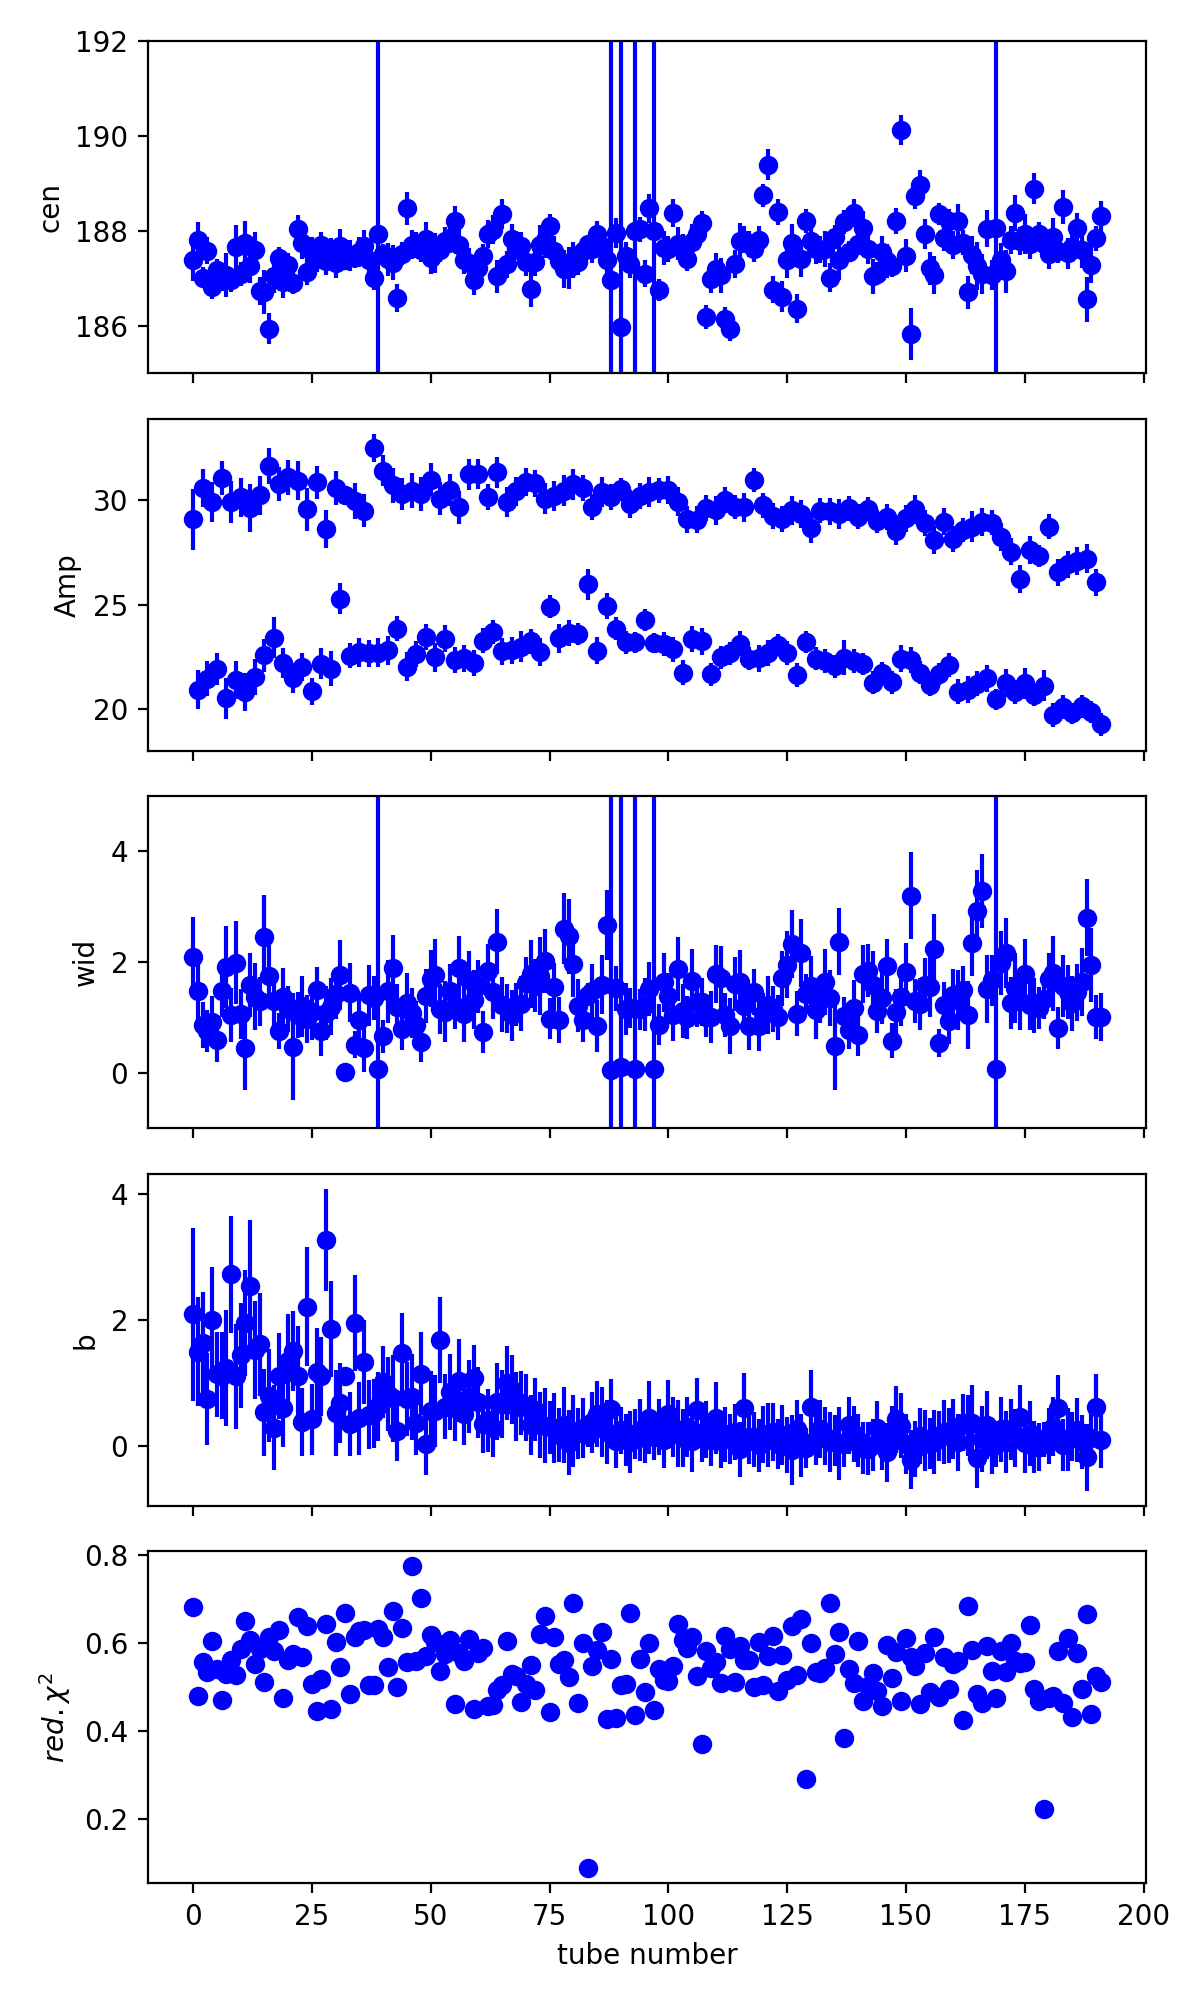

In [50]:
f,ax=plt.subplots(nrows=len(parm_nms)+1,sharex=True,figsize=(6,10))
y=np.arange(dat_array.shape[0])
for idx, p_name in enumerate (parm_nms):
    ax[idx].errorbar(y,fin_parms[p_name],yerr=fin_parms_err[p_name],fmt='bo')
    ax[idx].set_ylabel(p_name)
ax[idx+1].plot(y,fin_chisq,'bo')
ax[idx+1].set_ylabel('$red. \chi^2$')
ax[idx+1].set_xlabel('tube number')
ax[0].set_ylim([185,192])
ax[2].set_ylim([-1,5])
f.tight_layout()


Let's see why the erroabr for the width and center for tube 97 is so large

<IPython.core.display.Javascript object>


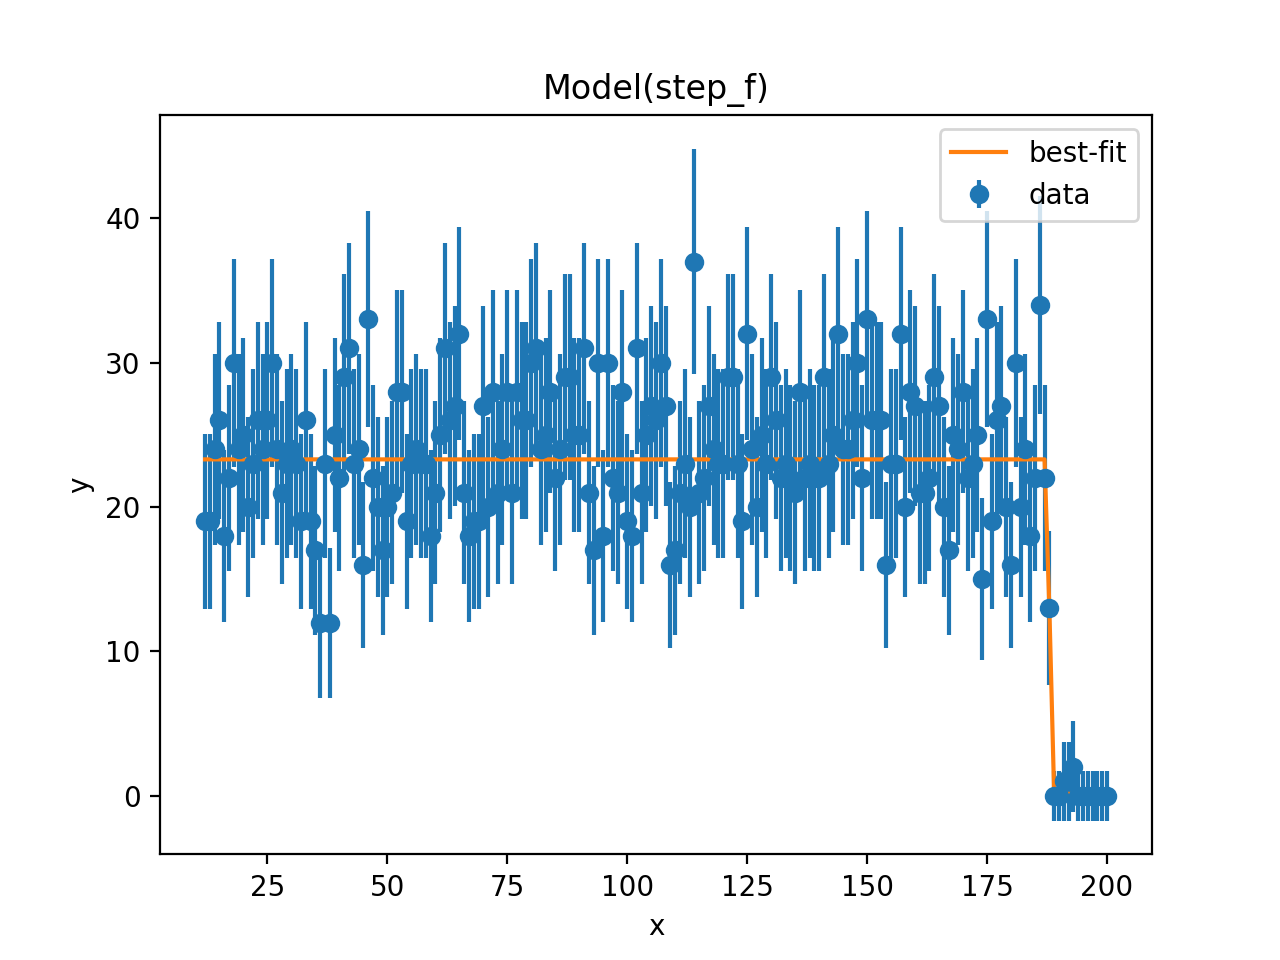

In [51]:
f,ax=plt.subplots()
step_res[97].plot_fit()


So there is only 1 point to set the width.
If we look at the fit report

In [52]:
print(step_res[97].fit_report())

[[Model]]
    Model(step_f)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 189
    # variables        = 4
    chi-square         = 82.7220353
    reduced chi-square = 0.44714614
    Akaike info crit   = -148.163329
    Bayesian info crit = -135.196341
[[Variables]]
    cen:  188.007377 +/- 3587815.31 (1908337.52%) (init = 190.8364)
    Amp:  23.1626091 +/- 0.49176374 (2.12%) (init = 30)
    wid:  0.06651499 +/- 32253666.2 (48490823507.22%) (init = 1)
    b:    0.13950593 +/- 0.36431428 (261.15%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(cen, wid) =  1.000
    C(Amp, b)   = -0.741



We find that the cen and width are highly correlated